In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load Datasets
# Load Telco dataset
telco_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Load Online Retail dataset
online_retail_df = pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
# View basic information about the datasets
print("Telco Dataset Info:")
print(telco_df.info())
print("\nOnline Retail Dataset Info:")
print(online_retail_df.info())

Telco Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

In [ ]:
# Check for missing values
print("Missing values in Telco Dataset:")
print(telco_df.isnull().sum())

Missing values in Telco Dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


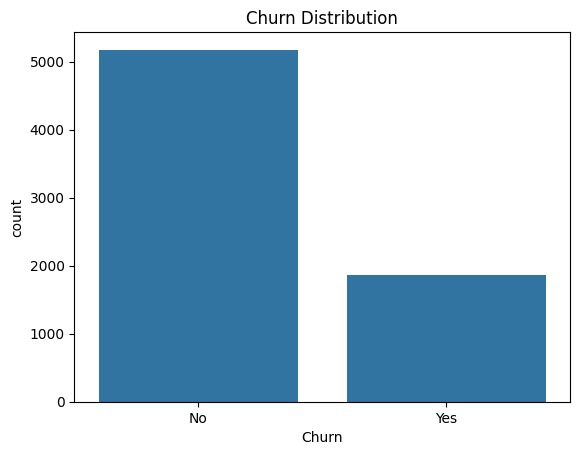


Churn proportions in Telco Dataset:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:

# Visualize the distribution of the churn target variable
sns.countplot(data=telco_df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Check the proportions of churn
print("\nChurn proportions in Telco Dataset:")
print(telco_df['Churn'].value_counts(normalize=True))


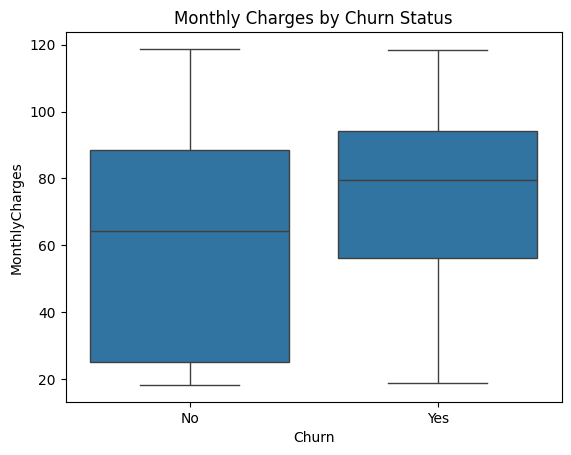

In [ ]:
# Visualize MonthlyCharges vs Churn
sns.boxplot(data=telco_df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.show()


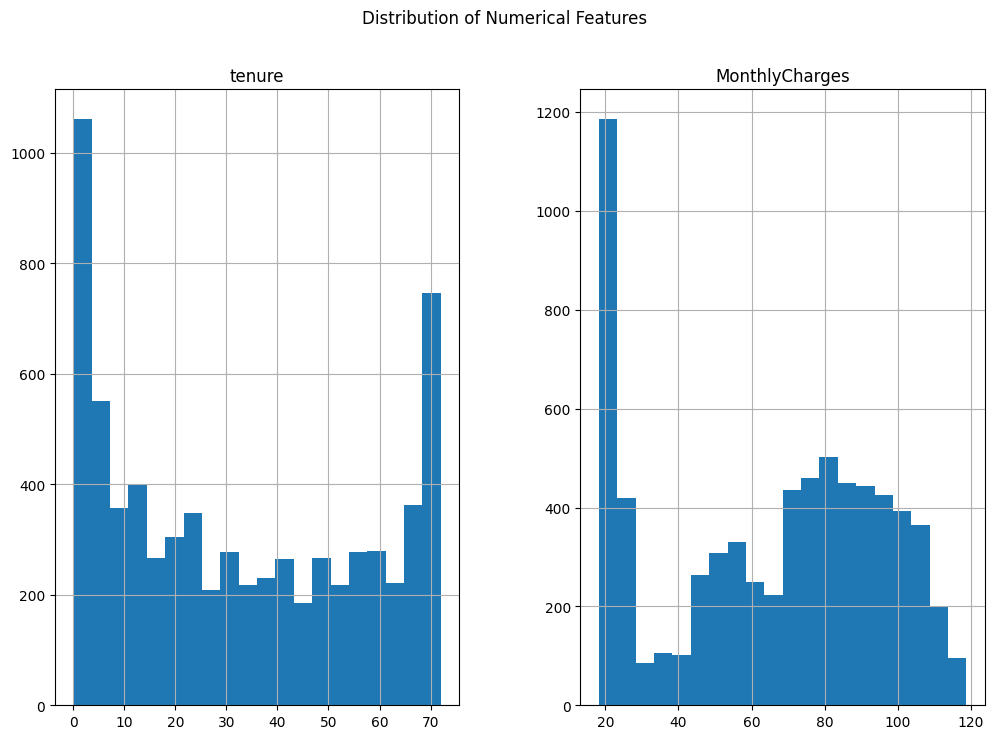

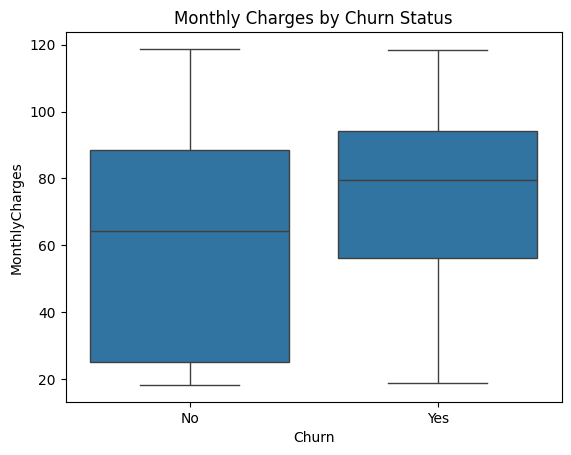

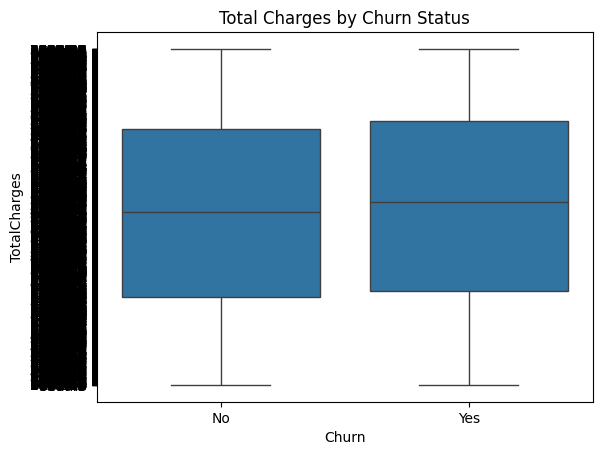

In [ ]:
# Histograms of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting histograms
telco_df[numerical_features].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots for identifying outliers
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges by Churn Status')
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=telco_df)
plt.title('Total Charges by Churn Status')
plt.show()


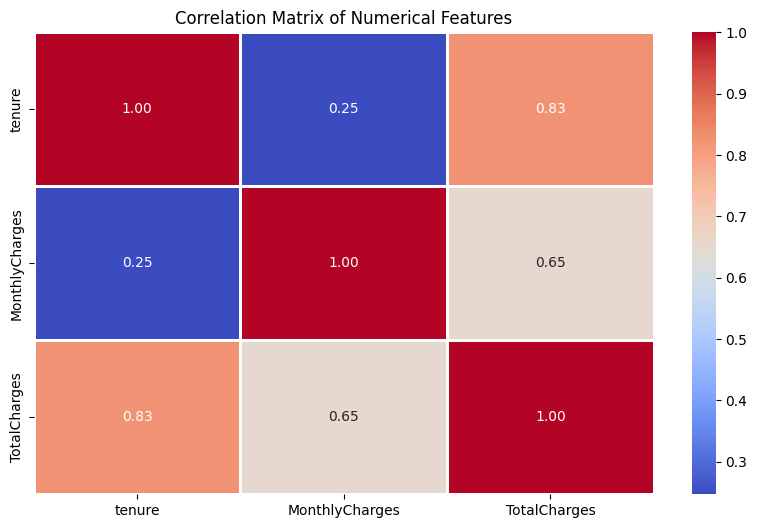

In [ ]:
# Convert 'TotalCharges' to numeric, handling errors
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
telco_df = telco_df.dropna(subset=['TotalCharges'])

# Correlation matrix for numerical features
correlation_matrix = telco_df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# 1. Identify categorical columns in your DataFrame
categorical_cols = telco_df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns in telco_df: {categorical_cols}")

# 2. Update categorical_features with actual column names
categorical_features = categorical_cols  # Or select specific columns from categorical_cols

Categorical columns in telco_df: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


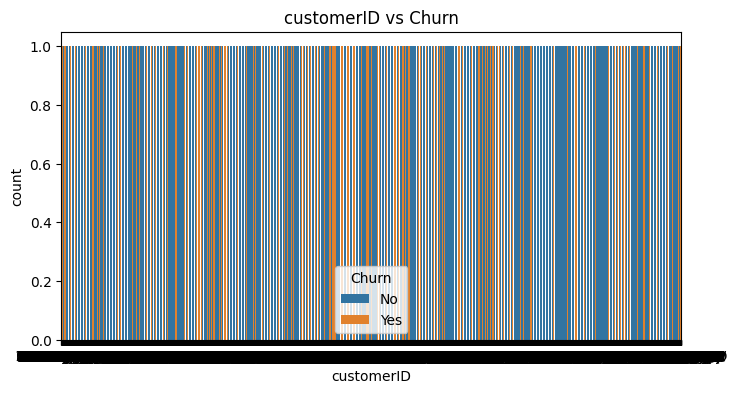

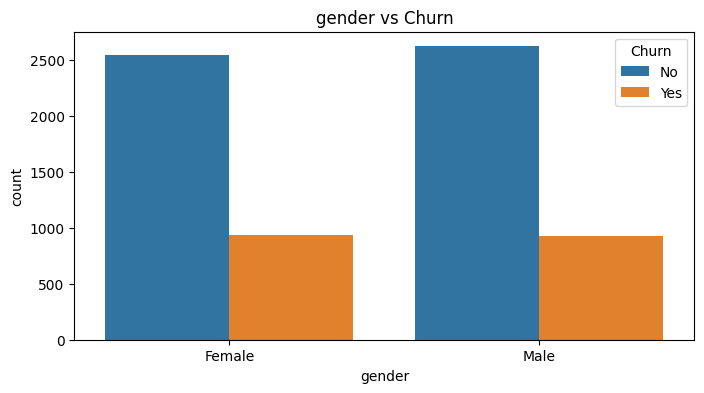

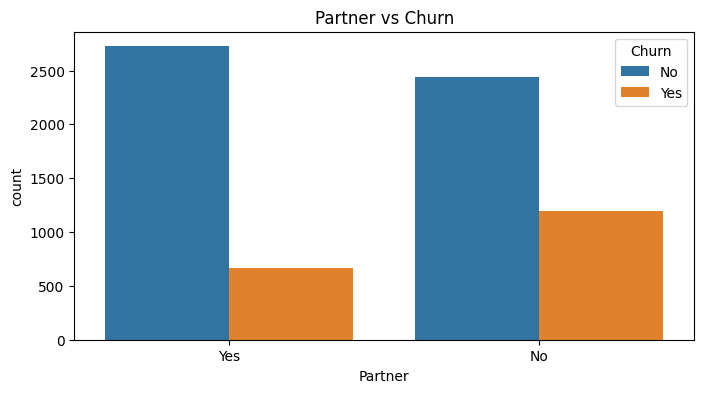

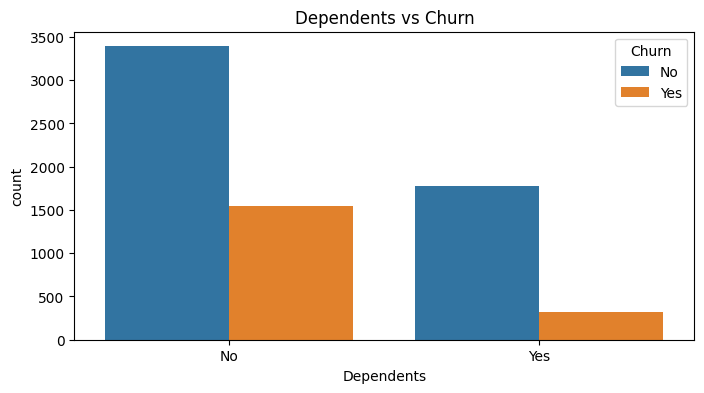

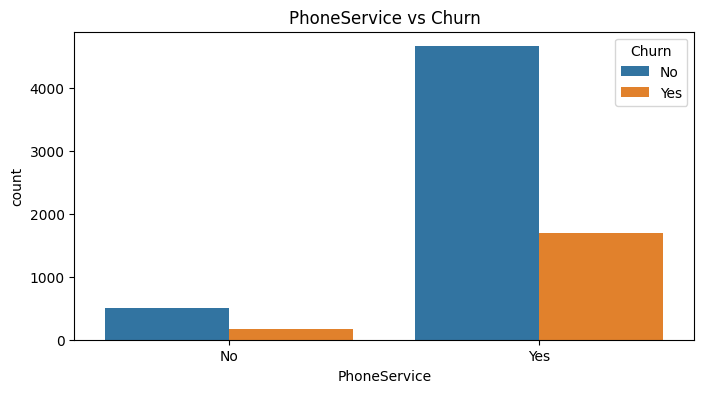

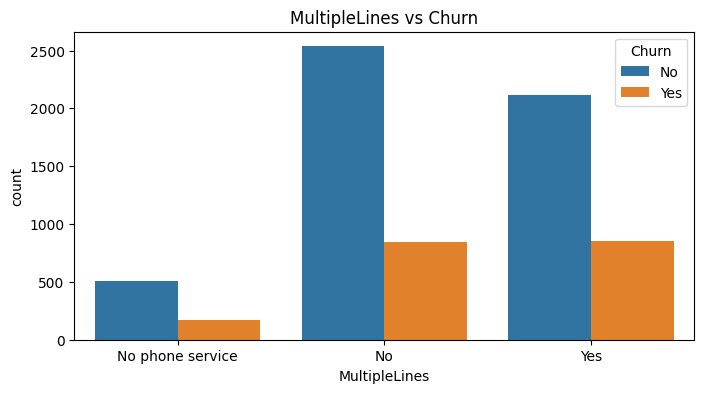

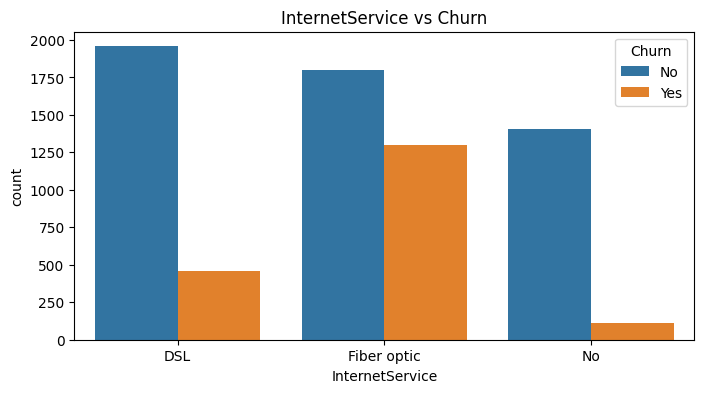

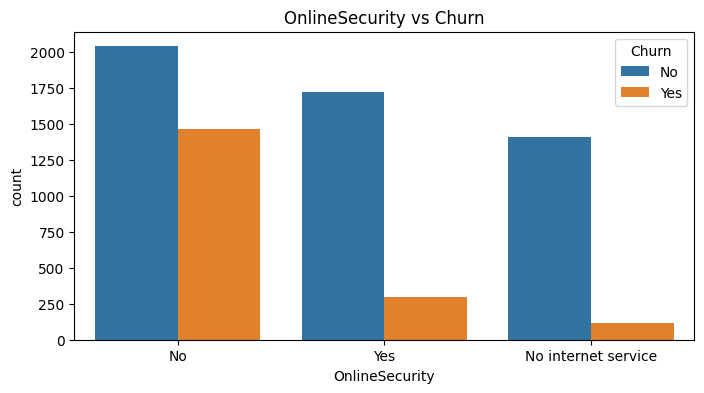

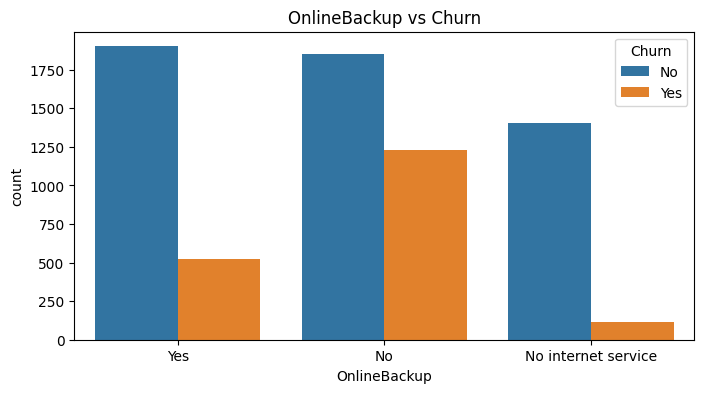

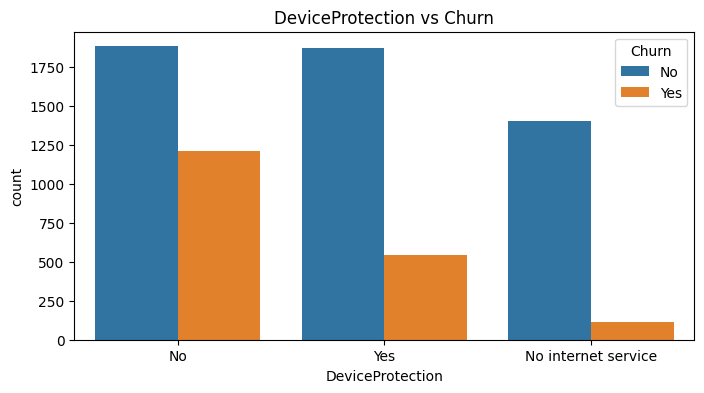

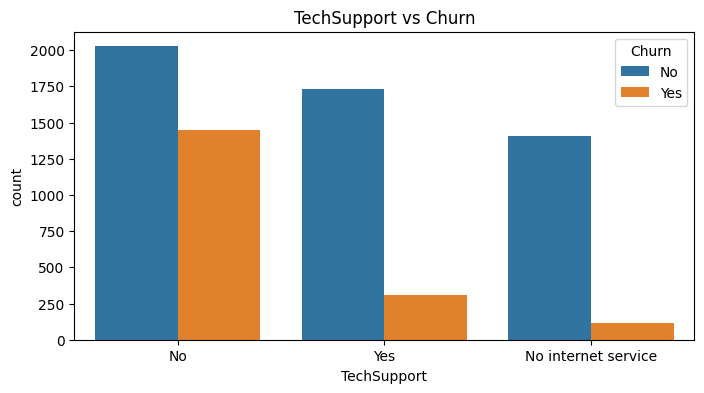

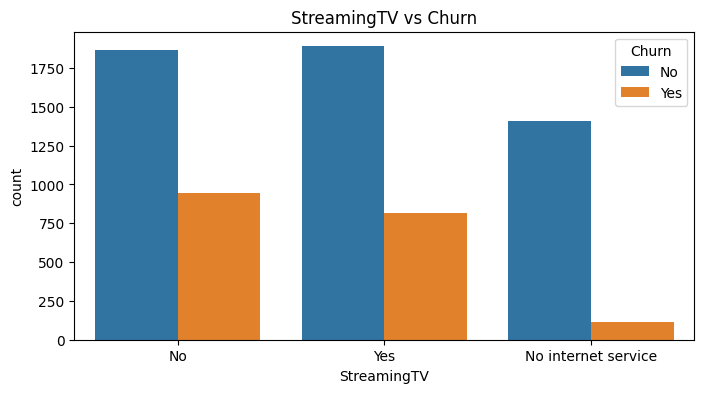

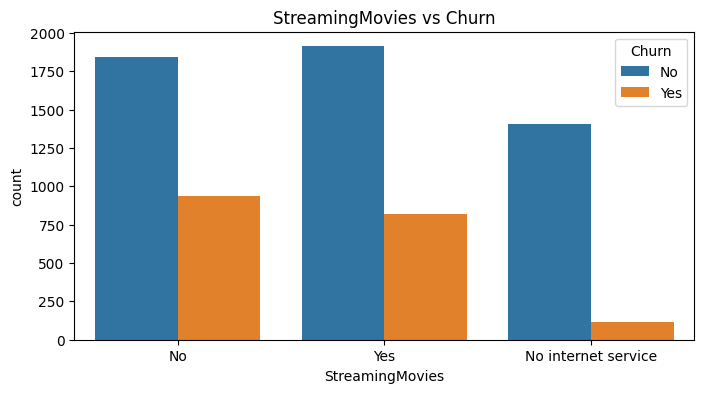

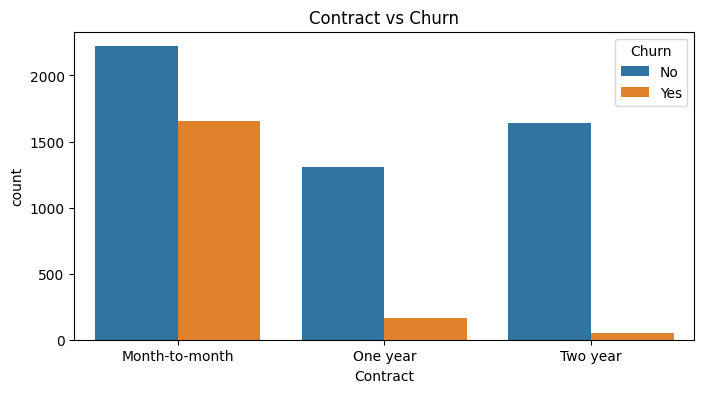

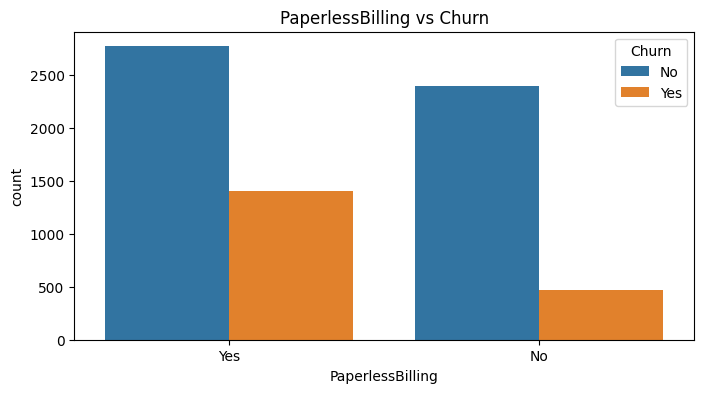

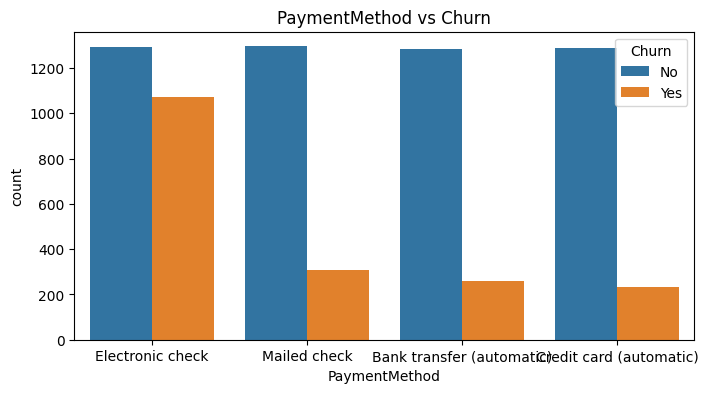

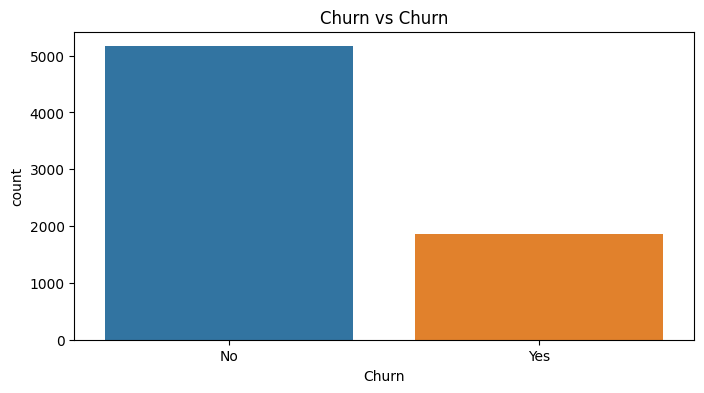

In [ ]:
# 3. Visualize categorical features with respect to churn
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=telco_df, x=feature, hue='Churn')
    plt.title(f'{feature} vs Churn')
    plt.show()

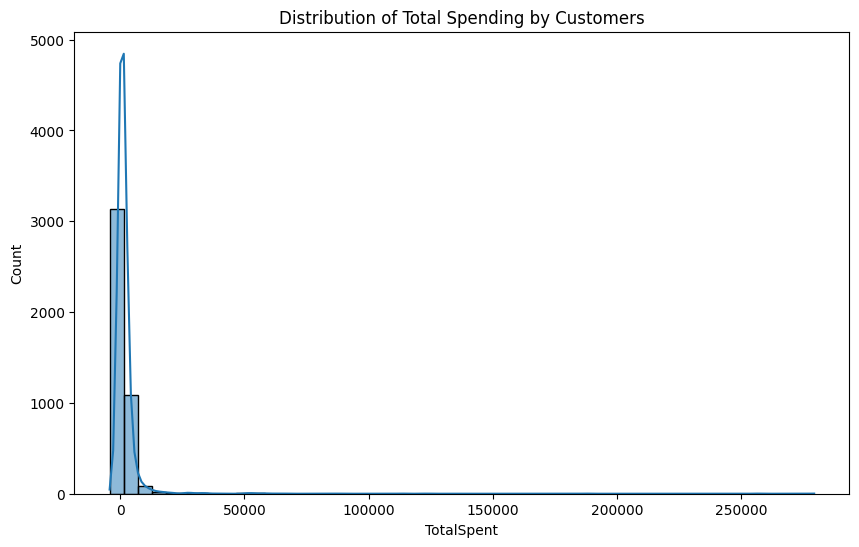

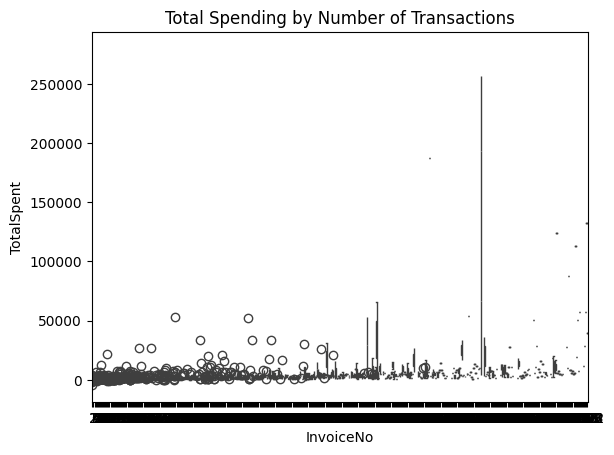

In [ ]:
# Clean the Online Retail dataset: remove missing values
online_retail_df = online_retail_df.dropna().drop_duplicates()

# Calculate total spending per transaction
online_retail_df['TotalSpent'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

# Aggregate spending and transaction counts by customer
customer_spending = online_retail_df.groupby('CustomerID').agg({
    'TotalSpent': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

# Visualize customer spending patterns
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['TotalSpent'], bins=50, kde=True)
plt.title('Distribution of Total Spending by Customers')
plt.show()

# Boxplot of total spending by number of invoices (engagement)
sns.boxplot(x='InvoiceNo', y='TotalSpent', data=customer_spending)
plt.title('Total Spending by Number of Transactions')
plt.show()


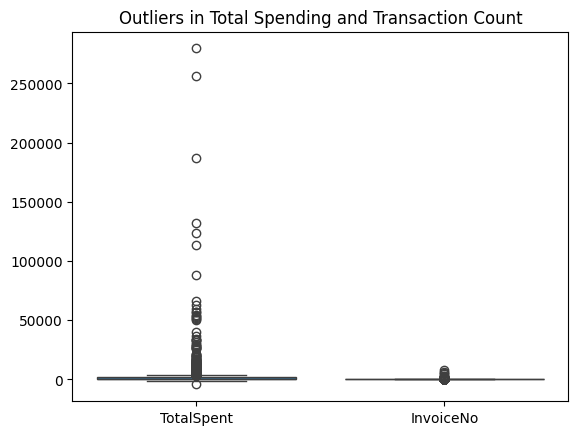

In [ ]:
# Boxplot for detecting outliers in total spending and transaction count
sns.boxplot(data=customer_spending[['TotalSpent', 'InvoiceNo']])
plt.title('Outliers in Total Spending and Transaction Count')
plt.show()


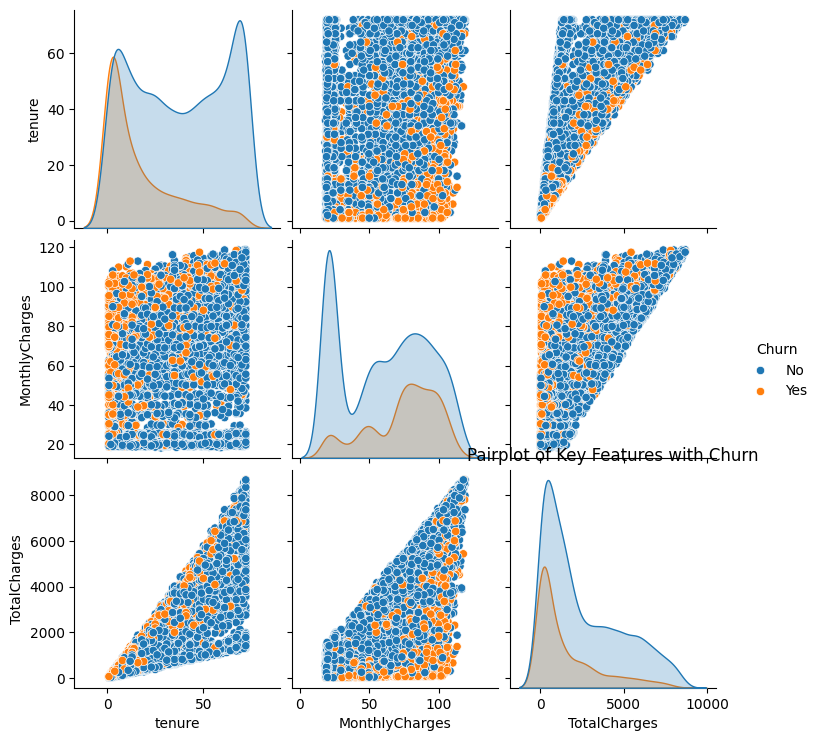

In [ ]:
# Pairplot for feature relationships
sns.pairplot(telco_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.title('Pairplot of Key Features with Churn')
plt.show()


In [ ]:
# Step 2: Data Preprocessing for Telco Dataset
# Handle missing values in TotalCharges
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df = telco_df.dropna()

# One-Hot Encoding for Telco dataset
telco_df = pd.get_dummies(telco_df, columns=['gender', 'Partner', 'Dependents',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService', 'OnlineSecurity',
                                              'OnlineBackup', 'DeviceProtection',
                                              'TechSupport', 'StreamingTV',
                                              'StreamingMovies', 'Contract',
                                              'PaperlessBilling', 'PaymentMethod'], drop_first=True)

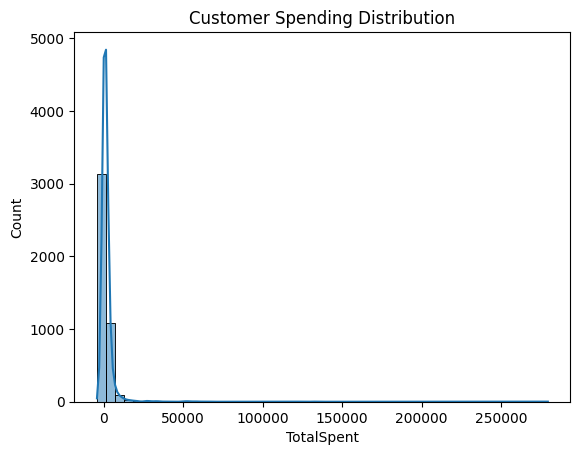

In [ ]:
# Step 3: Data Preprocessing for Online Retail Dataset
# Remove missing values and duplicates
online_retail_df = online_retail_df.dropna().drop_duplicates()

# Calculate total spending per transaction
online_retail_df['TotalSpent'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

# Aggregate spending per customer
customer_spending = online_retail_df.groupby('CustomerID').agg({
    'TotalSpent': 'sum',
    'InvoiceNo': 'count'
}).reset_index()
# Visualize spending distribution
sns.histplot(customer_spending['TotalSpent'], bins=50, kde=True)
plt.title('Customer Spending Distribution')
plt.show()

In [ ]:
# Merge Telco dataset and Retail spending data on CustomerID
telco_df['customerID'] = telco_df['customerID'].astype(str)
customer_spending['CustomerID'] = customer_spending['CustomerID'].astype(str)
merged_data = pd.merge(telco_df, customer_spending, left_on='customerID', right_on='CustomerID', how='left')
merged_data = merged_data.fillna(0)  # Fill missing retail data with zeros

<ipython-input-17-4feb5a91430b>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.fillna(0)  # Fill missing retail data with zeros


In [ ]:
# Step 4: Define Features and Target Variable
# Check the actual column names in your merged_data DataFrame using:
# print(merged_data.columns)
# Replace 'churn' with the actual column name representing churn in your data
# Assuming the actual column name is 'Churn'
X = merged_data.drop(columns=['Churn', 'customerID', 'CustomerID'])  # Features
y = merged_data['Churn']  # Target variable (churned or not)

In [ ]:
# Step 5: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Create Preprocessing Pipeline (Scaling and One-Hot Encoding)
# Define categorical and numerical columns

# Get all columns in X_train that start with the prefixes in the original categorical_columns list
categorical_columns = [col for col in X_train.columns
                       if any(col.startswith(prefix) for prefix in
                              ['gender_', 'Partner_', 'Dependents_', 'PhoneService_', 'MultipleLines_',
                               'InternetService_', 'OnlineSecurity_', 'OnlineBackup_',
                               'DeviceProtection_', 'TechSupport_', 'StreamingTV_', 'StreamingMovies_',
                               'Contract_', 'PaperlessBilling_', 'PaymentMethod_'])]

# Check if InvoiceCount column exists in X_train before including in numerical_columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalSpent']
if 'InvoiceCount' in X_train.columns:
    numerical_columns.append('InvoiceCount')

# Create preprocessing pipeline for both categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)  # Handle unknown categories
    ])

In [ ]:
# Step 8: Create the Full Pipeline (Preprocessing + Model)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:

# Step 9: Train the Model using the Pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'TotalSpent']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender_Male', 'Partner_Yes',
                                                   'Dependents_Yes',
                                                   'PhoneService_Yes',
                                                   'MultipleLines_No phone '
                                                   'service',
                                                   'MultipleLines_Yes',
                                                   'InternetService_Fiber '
                                                   'opti...
                                                   'TechSupport_Yes',
                                                   'StreamingTV_No internet '
                                                   'service',
                                                   'StreamingTV_Yes',
                                                   'StreamingMovies_No '
                                                   'internet service',
                                                   'StreamingMovies_Yes',
                                                   'Contract_One year',
                                                   'Contract_Two year',
                                                   'PaperlessBilling_Yes',
                                                   'PaymentMethod_Credit card '
                                                   '(automatic)',
                                                   'PaymentMethod_Electronic '
                                                   'check',
                                                   'PaymentMethod_Mailed '
                                                   'check'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Step 10: Model Evaluation
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# Evaluate the model using classification report, accuracy, and AUC-ROC score
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.85      0.85      1037
         Yes       0.85      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy Score: 0.8470474346563408
ROC-AUC Score: 0.9212977931219327


In [ ]:
# Step 11: Feature Importance using Random Forest
rf_model = pipeline.named_steps['classifier']

# Get feature names after preprocessing
# This code gets the feature names from the preprocessor pipeline
# The feature names are obtained from the one-hot encoder (categorical features)
# and the numerical features specified in the pipeline
# The ohe.get_feature_names_out() method retrieves feature names for one-hot encoded features
# by prefixing original feature names with the category levels.
# The numerical features are added as they are.
# The final list of features is created by combining both categorical and numerical feature names.

# Get the one-hot encoder from the pipeline
ohe = pipeline.named_steps['preprocessor'].transformers_[1][1]

# Get feature names after one-hot encoding and numerical features
feature_names = list(ohe.get_feature_names_out(categorical_columns)) + list(numerical_columns)

feature_importances = pd.DataFrame({
    'Feature': feature_names,  # Use transformed feature names
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

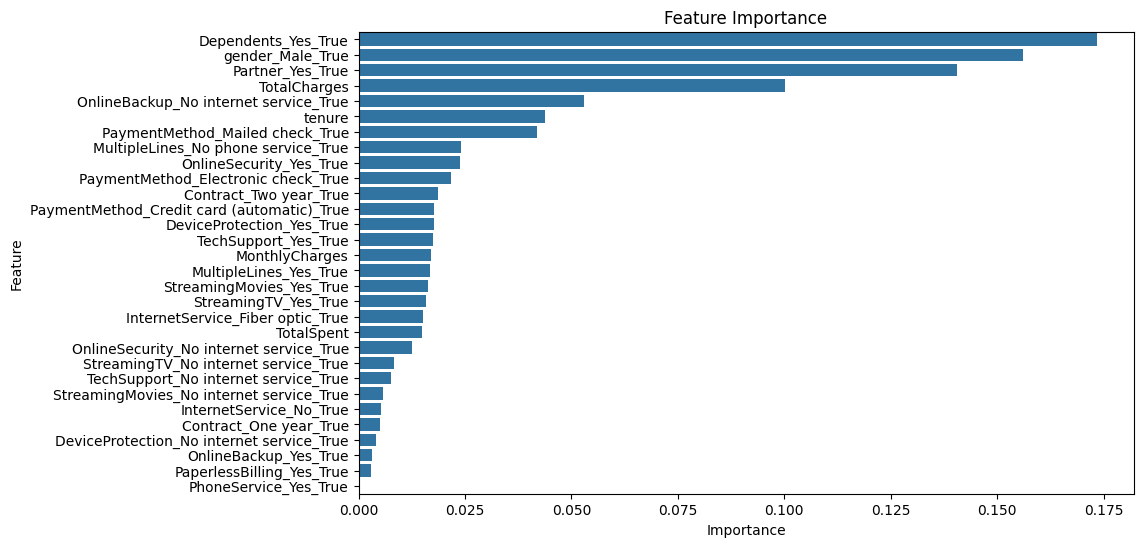

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()




In [ ]:
# Save the model for future use
import joblib
joblib.dump(pipeline, 'churn_prediction_pipeline.pkl')

# To load the model later
loaded_pipeline = joblib.load('churn_prediction_pipeline.pkl')

In [ ]:
import joblib

# Assuming 'pipeline' is your trained model
joblib.dump(pipeline, 'customer_churn_model.pkl')

['customer_churn_model.pkl']

In [ ]:
def predict_churn(new_data):
    # Load the saved model
    model = joblib.load('customer_churn_model.pkl')

    # Preprocess the new data (same steps as in training)
    new_data_processed = preprocess_data(new_data)  # Implement this function as needed

    # Predict churn
    prediction = model.predict(new_data_processed)
    return prediction


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load Datasets
# Load Telco dataset
telco_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Step 2: Data Preprocessing for Telco Dataset
# Handle missing values in TotalCharges
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df = telco_df.dropna()  # Drop rows with missing values

# Convert categorical features to numerical using One-Hot Encoding
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# One-Hot Encoding for categorical features
telco_df = pd.get_dummies(telco_df, columns=categorical_columns, drop_first=True)

# Step 3: Feature Selection and Target Variable
# Define features (X) and target (y)
X = telco_df.drop(columns=['Churn', 'customerID'])
y = telco_df['Churn'].map({'Yes': 1, 'No': 0})  # Churn is the target variable

# Step 4: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 8: Model Evaluation
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Step 9: Save the model and scaler for future use
joblib.dump(rf_model, 'customer_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# To load the model and scaler later:
# loaded_model = joblib.load('customer_churn_model.pkl')
# loaded_scaler = joblib.load('scaler.pkl')

# Define a function to predict churn for new data
def predict_churn(new_data):
    # Load the saved model and scaler
    model = joblib.load('customer_churn_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Preprocess the new data: apply the same transformations as the training data
    new_data = pd.get_dummies(new_data, drop_first=True)

    # Ensure the new data has the same columns as the training data
    missing_cols = set(X.columns) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0  # Add missing columns with 0 values
    new_data = new_data[X.columns]  # Ensure the columns match the training set order

    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Predict churn
    prediction = model.predict(new_data_scaled)
    return prediction

# Example usage of the predict_churn function
# new_data = pd.DataFrame(...)  # Provide new data in the same format as the training data
# prediction = predict_churn(new_data)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1037
           1       0.86      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy Score: 0.8533397870280736
ROC-AUC Score: 0.922374570437074


In [ ]:
# Save the model, scaler, and training columns for future use
joblib.dump(rf_model, 'customer_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'training_columns.pkl')

['training_columns.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and scaler
model = joblib.load('customer_churn_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define a function to preprocess new data and predict churn
def preprocess_and_predict(new_data):
    # Convert categorical features to numerical using One-Hot Encoding
    categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                           'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                           'PaperlessBilling', 'PaymentMethod']

    new_data = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)

    # Ensure the new data has the same columns as the training data
    training_columns = model.feature_names_in_
    missing_cols = set(training_columns) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0  # Add missing columns with 0 values
    new_data = new_data[training_columns]  # Ensure the columns match the training set order

    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Predict churn
    prediction = model.predict(new_data_scaled)
    return prediction

# Streamlit app
st.title('Customer Churn Prediction')

# Input fields for user to enter new data
st.header('Enter Customer Data')

# Example input fields (customize based on your dataset)
tenure = st.number_input('Tenure', min_value=0, max_value=100, value=1)
monthly_charges = st.number_input('Monthly Charges', min_value=0.0, max_value=1000.0, value=50.0)
total_charges = st.number_input('Total Charges', min_value=0.0, max_value=10000.0, value=100.0)
total_spent = st.number_input('Total Spent', min_value=0.0, max_value=10000.0, value=100.0)
invoice_count = st.number_input('Invoice Count', min_value=0, max_value=1000, value=1)

# Add more input fields for categorical features
gender = st.selectbox('Gender', ['Male', 'Female'])
partner = st.selectbox('Partner', ['Yes', 'No'])
dependents = st.selectbox('Dependents', ['Yes', 'No'])
phone_service = st.selectbox('Phone Service', ['Yes', 'No'])
multiple_lines = st.selectbox('Multiple Lines', ['No phone service', 'No', 'Yes'])
internet_service = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
online_security = st.selectbox('Online Security', ['No', 'Yes', 'No internet service'])
online_backup = st.selectbox('Online Backup', ['No', 'Yes', 'No internet service'])
device_protection = st.selectbox('Device Protection', ['No', 'Yes', 'No internet service'])
tech_support = st.selectbox('Tech Support', ['No', 'Yes', 'No internet service'])
streaming_tv = st.selectbox('Streaming TV', ['No', 'Yes', 'No internet service'])
streaming_movies = st.selectbox('Streaming Movies', ['No', 'Yes', 'No internet service'])
contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.selectbox('Paperless Billing', ['Yes', 'No'])
payment_method = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

# Create a DataFrame from the input data
new_data = pd.DataFrame({
    'tenure': [tenure],
    'MonthlyCharges': [monthly_charges],
    'TotalCharges': [total_charges],
    'TotalSpent': [total_spent],
    'InvoiceCount': [invoice_count],
    'gender': [gender],
    'Partner': [partner],
    'Dependents': [dependents],
    'PhoneService': [phone_service],
    'MultipleLines': [multiple_lines],
    'InternetService': [internet_service],
    'OnlineSecurity': [online_security],
    'OnlineBackup': [online_backup],
    'DeviceProtection': [device_protection],
    'TechSupport': [tech_support],
    'StreamingTV': [streaming_tv],
    'StreamingMovies': [streaming_movies],
    'Contract': [contract],
    'PaperlessBilling': [paperless_billing],
    'PaymentMethod': [payment_method]
})

# Predict button
if st.button('Predict Churn'):
    # Preprocess the new data and predict churn
    prediction = preprocess_and_predict(new_data)

    # Display the prediction
    if prediction[0] == 1:
        st.write('The customer is likely to churn.')
    else:
        st.write('The customer is not likely to churn.')

# Run the app using the command: streamlit run app.py

2024-11-27 16:17:14.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-27 16:17:14.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

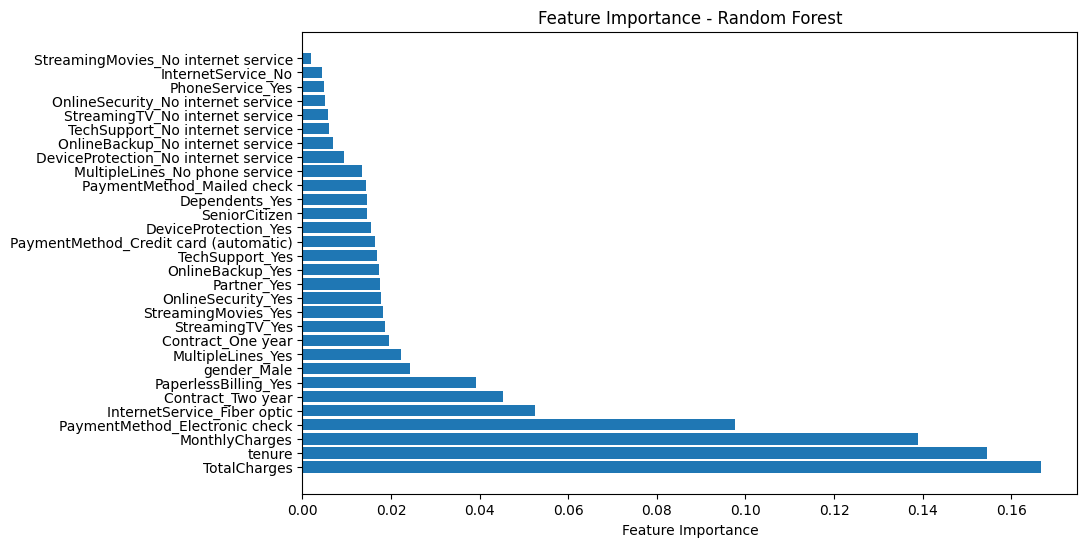

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.show()
